# Pymaceuticals Inc.
---

### Analysis

Based on the "tumor_df" dataframe in the summary section below, you can see that both Capomulin and Ramicane performed noticibly better than the other 8 drugs and were able to shrink the overall tumor volumes by roughly 11 mm3 comparitively. 

The pie chart indicates an almost perfect split between male (51%) and female (49%) mice that took part in the drug testing.

There is a strong correlation between mouse weight and tumor volume (.84) where the more the mouse weighs, the larger the tumor. 

In [135]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as st
from scipy.stats import pearsonr, linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
mouse_data_combined = pd.merge(mouse_metadata, study_results, how="left", on=["Mouse ID", "Mouse ID"])

# Display the data table for preview
mouse_data_combined.head(10)


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
5,k403,Ramicane,Male,21,16,25,33.464577,1
6,k403,Ramicane,Male,21,16,30,31.099498,1
7,k403,Ramicane,Male,21,16,35,26.546993,1
8,k403,Ramicane,Male,21,16,40,24.365505,1
9,k403,Ramicane,Male,21,16,45,22.050126,1


In [136]:
# Checking the number of mice.
mouse_count = mouse_data_combined["Mouse ID"].nunique()
mouse_count

249

In [137]:
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
mouse_duplicate_id = mouse_data_combined.loc[mouse_data_combined.duplicated(subset=["Mouse ID", "Timepoint"]), "Mouse ID"].unique()
mouse_duplicate_id

array(['g989'], dtype=object)

In [138]:
#Optional: Get all the data for the duplicate mouse ID. 
mouse_duplicate_id = mouse_data_combined.loc[mouse_data_combined["Mouse ID"] == "g989", :]
mouse_duplicate_id

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [139]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
minus_dup = mouse_data_combined[mouse_data_combined['Mouse ID'] != 'g989']
minus_dup

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [140]:
# Checking the number of mice in the clean DataFrame.
clean_mouse_count = minus_dup["Mouse ID"].nunique()
clean_mouse_count

248

## Summary Statistics

In [141]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
tumor_volume = minus_dup.groupby(['Drug Regimen'])
tumor_mean = tumor_volume['Tumor Volume (mm3)'].mean()
tumor_median = tumor_volume['Tumor Volume (mm3)'].median()
tumor_variance = tumor_volume['Tumor Volume (mm3)'].var()
tumor_std_dev = tumor_volume['Tumor Volume (mm3)'].std()
tumor_std_dev_err = tumor_volume['Tumor Volume (mm3)'].sem()

# Assemble the resulting series into a single summary DataFrame.
tumor_df = pd.DataFrame ({
    'Mean Tumor Volume':tumor_mean,
    'Median Tumor Volume':tumor_median,
    'Tumor Volume Variance':tumor_variance,
    'Tumor Volume Std. Dev.':tumor_std_dev,
    'Tumor Volume Std. Err.':tumor_std_dev_err
})

tumor_df = tumor_df.sort_values('Mean Tumor Volume')
tumor_df

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Zoniferol,53.236507,51.818479,48.533355,6.966589,0.516398
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466


In [142]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation, 
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
tumor_df2 = minus_dup.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].agg(['mean', 'median', 'var', 'std', 'sem'])
tumor_df2

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

In [143]:
# List of drugs 
drug_list = minus_dup["Drug Regimen"].unique()
drug_list

array(['Ramicane', 'Capomulin', 'Infubinol', 'Placebo', 'Ceftamin',
       'Stelasyn', 'Zoniferol', 'Ketapril', 'Propriva', 'Naftisol'],
      dtype=object)

In [144]:
# List of timepoint
timepoint = minus_dup['Timepoint'].unique()
timepoint

array([ 0,  5, 10, 15, 20, 25, 30, 35, 40, 45])

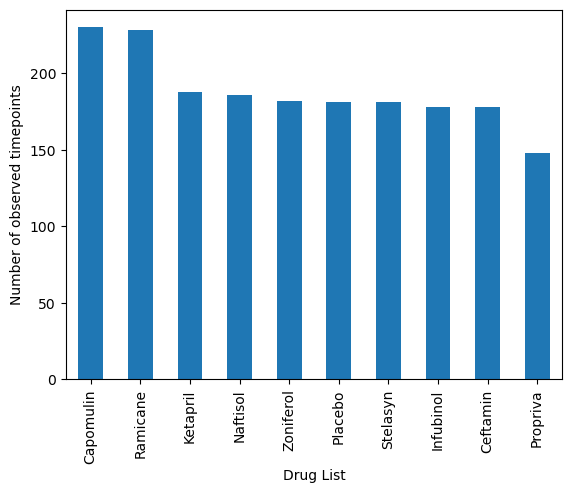

In [145]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
bar_chart = minus_dup['Drug Regimen'].value_counts().plot.bar()
bar_chart.set_xlabel("Drug List")
bar_chart.set_ylabel("Number of observed timepoints")
plt.show()

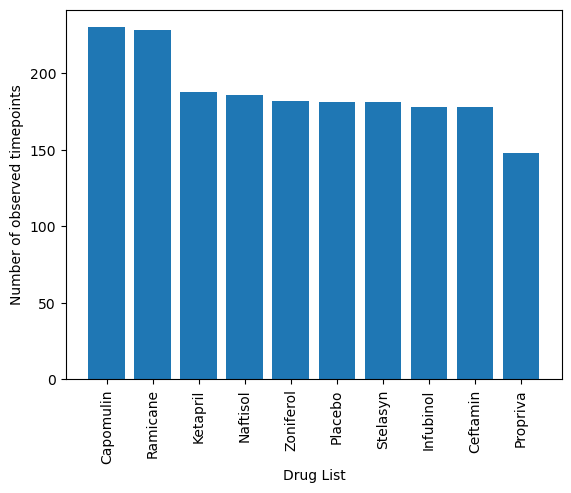

In [146]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
bar_chart2 = minus_dup['Drug Regimen'].value_counts()
plt.bar(bar_chart2.index.values,bar_chart2.values)

# Rotate drug names for readability
plt.xticks(rotation=90)

# X and Y axis names
plt.xlabel("Drug List")
plt.ylabel("Number of observed timepoints")
plt.show()

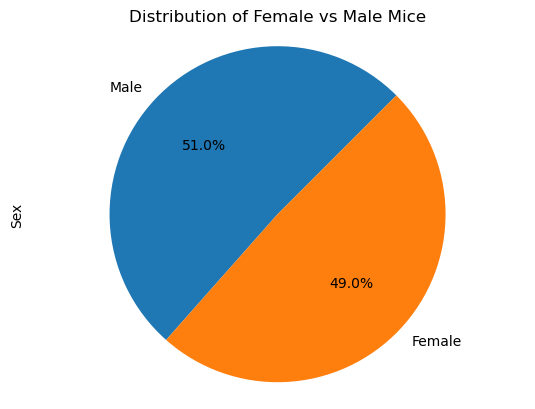

In [147]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
gender_distro = minus_dup['Sex'].value_counts()
gender_distro.plot.pie(autopct='%1.1f%%', startangle=45)
plt.axis('equal')
plt.title('Distribution of Female vs Male Mice')
plt.show()

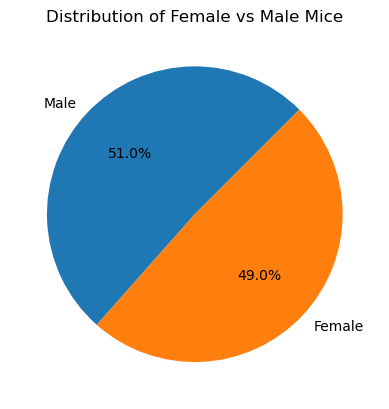

In [148]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
gender_distro = minus_dup['Sex'].value_counts()
plt.pie(gender_distro, labels=gender_distro.index.values, autopct="%1.1f%%", startangle=45)
plt.title('Distribution of Female vs Male Mice')
plt.show()

## Quartiles, Outliers and Boxplots

In [149]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens: Capomulin, Ramicane, Infubinol, and Ceftamin
# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint

#Drug Dataframes
Capomulin_df = minus_dup.loc[minus_dup["Drug Regimen"] == "Capomulin", :]
Ramicane_df = minus_dup.loc[minus_dup["Drug Regimen"] == "Ramicane", :]
Infubinol_df = minus_dup.loc[minus_dup["Drug Regimen"] == "Infubinol", :]
Ceftamin_df = minus_dup.loc[minus_dup["Drug Regimen"] == "Ceftamin", :]

# Last (greatest) timepoint for each mouse per drug & final tumor volume per mouse per drug
last_tp = minus_dup.groupby('Mouse ID')['Timepoint'].max()
last_tp = pd.DataFrame(last_tp)
last_tp = last_tp.reset_index()
max_merge = pd.merge(last_tp, minus_dup, how="left", on=["Mouse ID", "Timepoint"])
max_merge.head(10)

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a262,45,Placebo,Female,17,29,70.717621,4
3,a275,45,Ceftamin,Female,20,28,62.999356,3
4,a366,30,Stelasyn,Female,16,29,63.440686,1
5,a401,45,Zoniferol,Female,8,25,66.794156,4
6,a411,45,Ramicane,Male,3,22,38.407618,1
7,a444,45,Ramicane,Female,10,25,43.047543,0
8,a457,10,Ketapril,Female,11,30,49.783419,0
9,a492,45,Stelasyn,Male,20,25,60.122011,1


In [150]:
# Put treatments into a list for for loop (and later for plot labels)
drug_list = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_list = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for drug in drug_list:
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    final_tumor_vol = max_merge.loc[max_merge["Drug Regimen"] == drug, 'Tumor Volume (mm3)']
    
    # add subset to empty list
    tumor_vol_list.append(final_tumor_vol)
        
    # Calculate quartiles
    Quartiles = final_tumor_vol.quantile([.25, .5, .75])
    Q1 = Quartiles[0.25]
    Q3 = Quartiles[0.75]
    
    # Compute interquartile range (IQR)
    IQR = Q3 - Q1
    
    # Define lower bound
    lower_bound = Q1 - (1.5 * IQR)
    
    # Define upper bound
    upper_bound = Q3 + (1.5 * IQR)

    # Identify outliers
    outliers = final_tumor_vol.loc[(final_tumor_vol < lower_bound) | (final_tumor_vol > upper_bound)]

    print(f"{drug}'s potential outliers: {outliers}")

Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


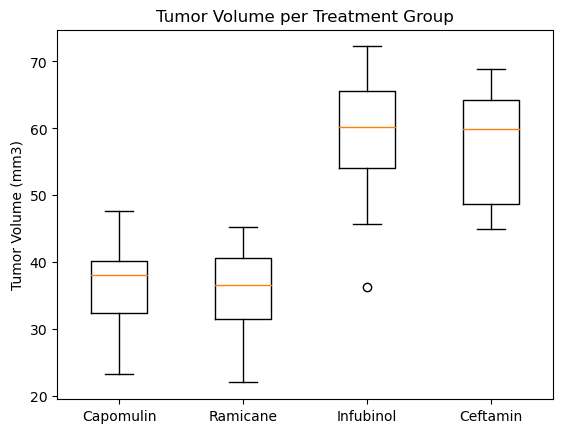

In [153]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
plt.boxplot(tumor_vol_list)
plt.xticks(range(1, len(drug_list) + 1), drug_list)
plt.title('Tumor Volume per Treatment Group')
plt.ylabel('Tumor Volume (mm3)')
plt.show()

## Line and Scatter Plots

Text(0, 0.5, 'Tumor Volume (mm3)')

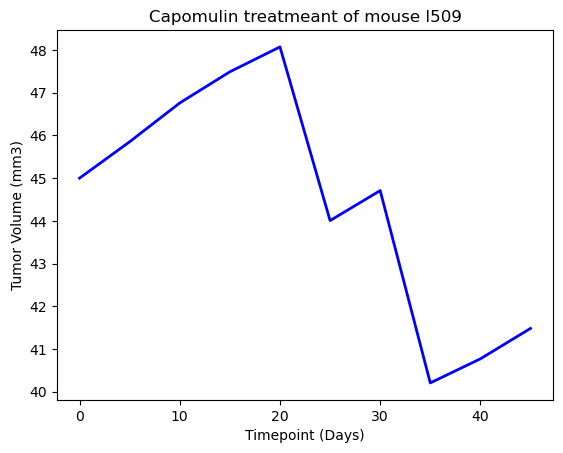

In [154]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
line_plot = Capomulin_df.loc[Capomulin_df["Mouse ID"] == "l509",:]
line_plot.head()
x_axis = line_plot["Timepoint"]
tumor_vol = line_plot["Tumor Volume (mm3)"]

fig1, ax1 = plt.subplots()
plt.title('Capomulin treatmeant of mouse l509')
plt.plot(x_axis, tumor_vol,linewidth=2, color="blue")
plt.xlabel('Timepoint (Days)')
plt.ylabel('Tumor Volume (mm3)')

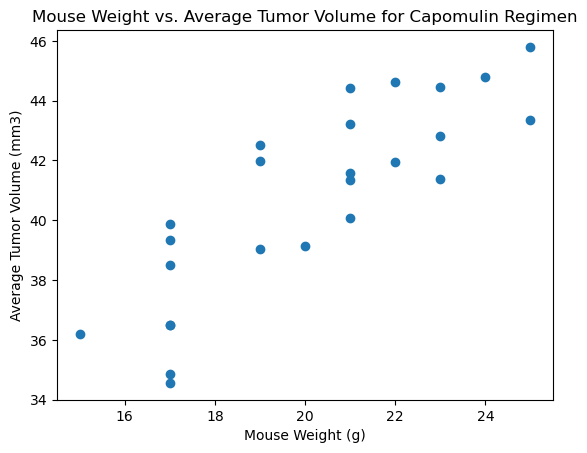

In [155]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
# Step 1: Filter the data for Capomulin regimen
Capomulin_df = Capomulin_df[Capomulin_df['Drug Regimen'] == 'Capomulin']

# Step 2: Group the data by 'Mouse ID' and calculate the average tumor volume
avg_tumor_volume = Capomulin_df.groupby('Mouse ID')['Tumor Volume (mm3)'].mean()

# Step 3: Retrieve the corresponding mouse weight for each mouse
mouse_weights = Capomulin_df.groupby('Mouse ID')['Weight (g)'].first()

# Step 4: Plot the scatter plot
plt.scatter(mouse_weights, avg_tumor_volume)
plt.xlabel('Mouse Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.title('Mouse Weight vs. Average Tumor Volume for Capomulin Regimen')
plt.show()

## Correlation and Regression

In [156]:
# Calculate the correlation coefficient and a linear regression model for 
# mouse weight and average observed tumor volume for the entire Capomulin regimen
correlation_coef, p_value = st.pearsonr(mouse_weights, avg_tumor_volume)
print(f"The correlation coefficient for mouse weight and average tumor volume is: {correlation_coef}")

The correlation coefficient for mouse weight and average tumor volume is: 0.841936342469472


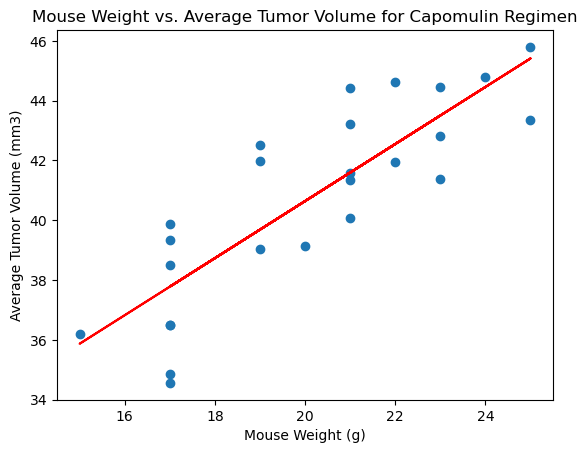

In [157]:
plt.scatter(mouse_weights, avg_tumor_volume)
plt.plot(mouse_weights, intercept + slope * mouse_weights, color='red', label='Linear Regression')
slope, intercept, r_value, p_value, std_err = linregress(mouse_weights, avg_tumor_volume)
plt.xlabel('Mouse Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.title('Mouse Weight vs. Average Tumor Volume for Capomulin Regimen')
plt.show()